Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter the story description: A brave knight ventures into a misty enchanted forest. They cross a rickety bridge over a glowing river, battle a fierce dragon atop a crumbling castle, and uncover a hidden magical amulet in a secret grove. Finally, they ride off on a winged horse toward a golden sunset.
Enter number of frames (3-9): 3
Enter color scheme (e.g., vibrant, monochrome, pastel): vibrant
Enter art style (e.g., comic book, watercolor, digital art, anime): Fantasy watercolor


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

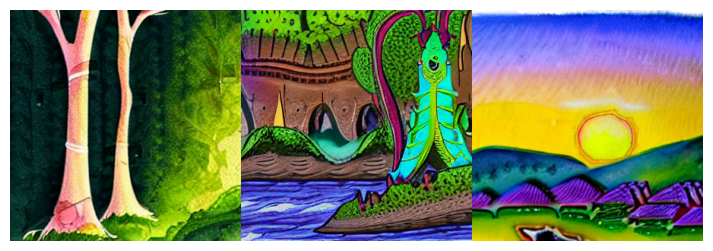

Storyboard saved as 'storyboard.png'


In [ ]:
# Install required libraries
!pip install diffusers transformers torch Pillow matplotlib opencv-python

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import re

# Set up Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Get user input
story_prompt = input("Enter the story description: ")
num_frames = int(input("Enter number of frames (3-9): "))
color_scheme = input("Enter color scheme (e.g., vibrant, monochrome, pastel): ")
art_style = input("Enter art style (e.g., comic book, watercolor, digital art, anime): ")

# Validate number of frames
if num_frames < 3 or num_frames > 9:
    raise ValueError("Number of frames must be between 3 and 9")

# Break story into scenes (simple split by sentences)
scenes = re.split(r'[.!?]+', story_prompt)[:num_frames]
scenes = [s.strip() for s in scenes if s.strip()]
if len(scenes) < num_frames:
    scenes += [story_prompt] * (num_frames - len(scenes))

# Generate images for each scene
images = []
for i, scene in enumerate(scenes):
    prompt = f"{scene}, {color_scheme} colors, {art_style} style"
    image = pipe(prompt, height=304, width=304, num_inference_steps=50).images[0]
    images.append(image)

# Create storyboard grid
rows = 1 if num_frames <= 6 else 2
cols = (num_frames + 1) // 2 if num_frames > 6 else num_frames
canvas_width = cols * 304
canvas_height = rows * 304
canvas = Image.new('RGB', (canvas_width, canvas_height), 'white')

# Paste images into grid
for i, img in enumerate(images):
    x = (i % cols) * 304
    y = (i // cols) * 304
    canvas.paste(img, (x, y))

# Display the storyboard
plt.figure(figsize=(cols * 3, rows * 3))
plt.imshow(canvas)
plt.axis('off')
plt.show()

# Save to local directory
canvas.save('storyboard.png')
print("Storyboard saved as 'storyboard.png'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Enter the story description: A young wizard ventures into an enchanted forest. They discover a hidden grove with magical flowers, battle a shadowy beast, and find a glowing spellbook. Finally, they cast a spell to light up the night sky. 
Enter number of frames (3-6): 4
Enter color scheme (e.g., vibrant, warm, cool): Vibrant
Enter art style (e.g., comic book, watercolor, anime): Fantasy watercolor


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

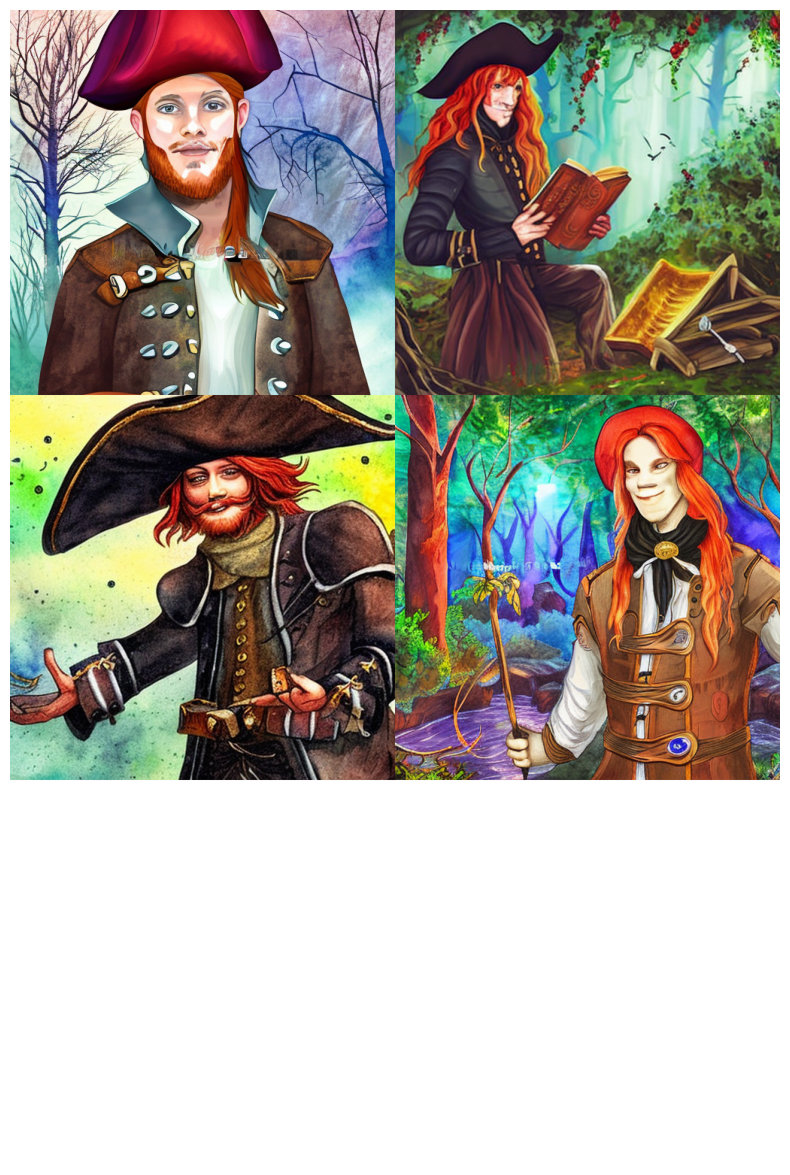

Storyboard saved as 'storyboard.png'


In [ ]:
# Install required libraries
!pip install diffusers transformers torch Pillow matplotlib

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import re
import numpy as np

# Set up a lighter Stable Diffusion model for Colab
model_id = "stabilityai/stable-diffusion-2-1-base"  # Lighter model for better performance in Colab
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Get user input
story_prompt = input("Enter the story description: ")
num_frames = int(input("Enter number of frames (3-6): "))  # Limiting to 6 for a 3x2 grid
color_scheme = input("Enter color scheme (e.g., vibrant, warm, cool): ")
art_style = input("Enter art style (e.g., comic book, watercolor, anime): ")

# Validate number of frames
if num_frames < 3 or num_frames > 6:
    raise ValueError("Number of frames must be between 3 and 6")

# Break story into scenes (split by sentences)
scenes = re.split(r'[.!?]+', story_prompt)[:num_frames]
scenes = [s.strip() for s in scenes if s.strip()]
if len(scenes) < num_frames:
    scenes += [story_prompt] * (num_frames - len(scenes))

# Generate images for each scene
images = []
character_consistency_prompt = "a pirate captain with red hair, wearing a black hat and brown coat"  # For consistent character design
for i, scene in enumerate(scenes):
    prompt = f"{character_consistency_prompt} in {scene}, {color_scheme} colors, {art_style} style, detailed background"
    image = pipe(prompt, height=512, width=512, num_inference_steps=30).images[0]  # Using 512x512 (divisible by 8)
    images.append(image)

# Create a 3x2 storyboard grid
rows = 3
cols = 2
frame_width, frame_height = 512, 512
canvas_width = cols * frame_width
canvas_height = rows * frame_height
canvas = Image.new('RGB', (canvas_width, canvas_height), 'white')

# Paste images into the grid (leaving empty slots if fewer than 6 frames)
for i in range(min(num_frames, rows * cols)):
    row = i // cols
    col = i % cols
    x = col * frame_width
    y = row * frame_height
    canvas.paste(images[i], (x, y))

# Display the storyboard
plt.figure(figsize=(cols * 5, rows * 5))
plt.imshow(np.array(canvas))
plt.axis('off')
plt.savefig('storyboard.png', bbox_inches='tight')
plt.show()

# Confirm save
print("Storyboard saved as 'storyboard.png'")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter the story description: A fierce pirate ship battles towering waves under a dark, stormy sky.
Enter number of frames (3-6): 5
Enter color scheme (e.g., vibrant, warm, cool): warm
Enter art style (e.g., comic book, watercolor, anime): anime


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

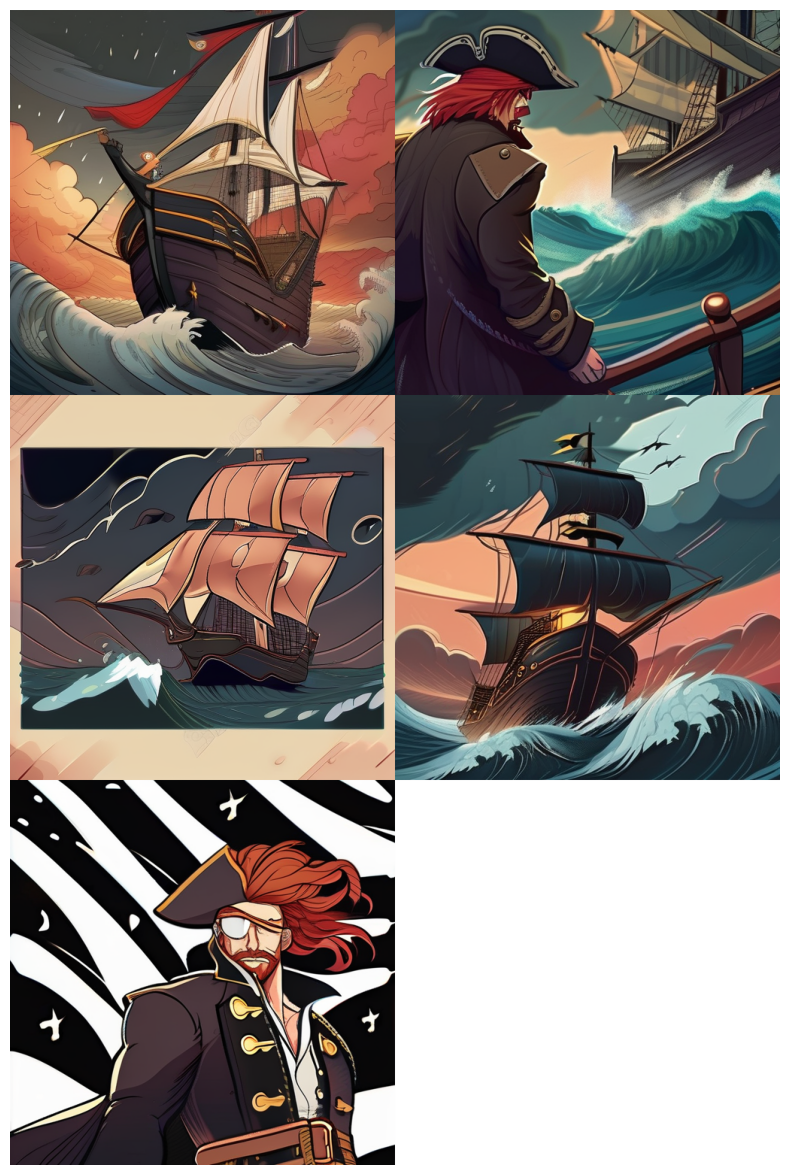

Storyboard saved as 'storyboard.png'


In [ ]:

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import re
import numpy as np

# Use a non-gated model
model_id = "stabilityai/stable-diffusion-xl-base-1.0"  # or "runwayml/stable-diffusion-v1-5"

# Load the pipeline (SDXL requires StableDiffusionXLPipeline)
if "xl" in model_id.lower():
    from diffusers import StableDiffusionXLPipeline
    pipe = StableDiffusionXLPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Get user input
story_prompt = input("Enter the story description: ")
num_frames = int(input("Enter number of frames (3-6): "))
color_scheme = input("Enter color scheme (e.g., vibrant, warm, cool): ")
art_style = input("Enter art style (e.g., comic book, watercolor, anime): ")

# Validate number of frames
if num_frames < 3 or num_frames > 6:
    raise ValueError("Number of frames must be between 3 and 6")

# Break story into scenes
scenes = re.split(r'[.!?]+', story_prompt)[:num_frames]
scenes = [s.strip() for s in scenes if s.strip()]
if len(scenes) < num_frames:
    scenes += [story_prompt] * (num_frames - len(scenes))

# Generate images
images = []
character_consistency_prompt = "a pirate captain with red hair, wearing a black hat and brown coat"
for i, scene in enumerate(scenes):
    prompt = f"{character_consistency_prompt} in {scene}, {color_scheme} colors, {art_style} style, detailed background"
    image = pipe(prompt, height=512, width=512, num_inference_steps=30).images[0]
    images.append(image)

# Create a grid
rows = 3
cols = 2
canvas = Image.new('RGB', (cols * 512, rows * 512), 'white')
for i in range(min(num_frames, rows * cols)):
    row, col = i // cols, i % cols
    canvas.paste(images[i], (col * 512, row * 512))

# Display and save
plt.figure(figsize=(10, 15))
plt.imshow(np.array(canvas))
plt.axis('off')
plt.savefig('storyboard.png', bbox_inches='tight')
plt.show()
print("Storyboard saved as 'storyboard.png'")